In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D

In [2]:
path =r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\data\student_admission_dataset.csv"
df=pd.read_csv(path)
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


# **Data exploraty ERD**

In [3]:
df.shape

(250, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,GPA,SAT_Score,Extracurricular_Activities
count,250.000000,250.000000,250.000000
mean,3.238320,1250.432000,5.204000
std,0.438607,204.733163,2.964716
min,2.500000,900.000000,0.000000
25%,2.850000,1080.250000,3.000000
50%,3.230000,1237.000000,5.000000
75%,3.590000,1426.000000,7.750000
max,4.000000,1598.000000,10.000000


In [6]:
df.columns

Index(['GPA', 'SAT_Score', 'Extracurricular_Activities', 'Admission_Status'], dtype='object')

In [7]:
df.head()

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted


In [8]:
df.tail()

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted
249,2.95,1583,1,Waitlisted


# **Check for duplicates**

In [9]:
df.duplicated().sum()

np.int64(0)

# **Check for null values**

In [10]:
df.isnull().sum()

GPA                           0
SAT_Score                     0
Extracurricular_Activities    0
Admission_Status              0
dtype: int64

# **Feature engineering**

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode the Admission_Status column
encoder = LabelEncoder()
df['Admission_Status'] = encoder.fit_transform(df['Admission_Status'])

print(df.head())
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

    GPA  SAT_Score  Extracurricular_Activities  Admission_Status
0  3.46       1223                           8                 1
1  2.54        974                           8                 1
2  2.91        909                           9                 1
3  2.83       1369                           5                 0
4  3.60       1536                           7                 0
{'Accepted': np.int64(0), 'Rejected': np.int64(1), 'Waitlisted': np.int64(2)}


# **Prepare data for modelling**

In [12]:
# Features and labels
X = df[['GPA', 'SAT_Score', 'Extracurricular_Activities']]
y = df['Admission_Status']

# **Train logistic regression model**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred = model.predict(X_test_scaled)

# **Evaluate performance**

In [17]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.34
Confusion Matrix:
 [[7 3 8]
 [4 5 8]
 [6 4 5]]
              precision    recall  f1-score   support

           0       0.41      0.39      0.40        18
           1       0.42      0.29      0.34        17
           2       0.24      0.33      0.28        15

    accuracy                           0.34        50
   macro avg       0.36      0.34      0.34        50
weighted avg       0.36      0.34      0.34        50



# **Decision boundry**

In [18]:
feature1 = 'GPA'
feature2 = 'SAT_Score'
fixed_value = X_train['Extracurricular_Activities'].mean()

In [19]:
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

In [20]:
grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, fixed_value)]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

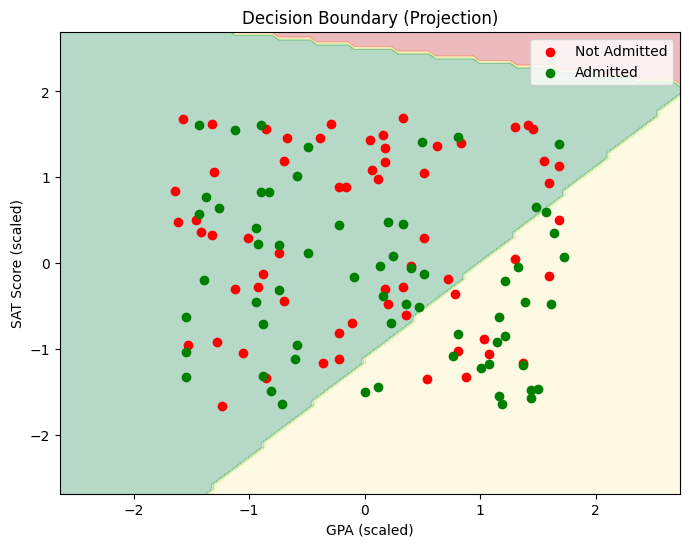

In [21]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)
plt.scatter(X_train_scaled[y_train==0,0], X_train_scaled[y_train==0,1], color='red', label='Not Admitted')
plt.scatter(X_train_scaled[y_train==1,0], X_train_scaled[y_train==1,1], color='green', label='Admitted')
plt.xlabel('GPA (scaled)')
plt.ylabel('SAT Score (scaled)')
plt.legend()
plt.title('Decision Boundary (Projection)')
plt.show()